In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"articles2.csv", 
names=['author','content',"description","publishedAt","source","title","url"])
df

,author,content,description,publishedAt,source,title,url
0,author,content,description,publishedAt,source,title,url
1,Ed Driscoll,"Things got pretty weird, pretty quickly in the...",THE MINISTRY OF TRUTH IS REAL: Things got pret...,2022-04-28T22:44:14Z,Instapundit.com,THE MINISTRY OF TRUTH IS REAL:\nThings got pre...,https://instapundit.com/517769/
2,Joe Battenfeld,"For millions of taxpayer dollars, the Biden ad...","Battenfeld: For millions of taxpayer dollars, ...",2022-04-30T19:37:23Z,Boston Herald,Battenfeld: Biden’s ‘Ministry of Truth’ sparks...,https://www.bostonherald.com/2022/04/30/batten...
3,"Hannah Bleau, \nHannah Bleau",Florida Gov. Ron DeSantis (R) bashed the Biden...,Florida Gov. Ron DeSantis (R) on Friday bashed...,2022-04-29T16:44:31Z,Breitbart News,Ron DeSantis: Biden Admin Installing a 'Minist...,https://www.breitbart.com/politics/2022/04/29/...
4,Jon Jackson,Conservative politicians and commentators are ...,The president's recently created bureau has be...,2022-04-29T15:55:33Z,Newsweek,Joe Biden's Disinformation Board Likened to Or...,https://www.newsweek.com/joe-bidens-disinforma...
5,David Robertson,(Photo: Getty/iStock)\r\nIt's an inspiring sto...,"If you control the Ministry of Truth, then the...",2022-05-03T09:39:55Z,Christiantoday.com,The fight to control truth in a post-truth world,https://christiantoday.com/article/the.fight.t...


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sentence = df['content'][2]
sid.polarity_scores(sentence)['compound']

-0.0772

In [ ]:
def cleaner(articless):
    articless = re.sub("@[A-Za-z0-9]+","",articless) #Remove @ sign
    articless = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", articless) #Remove http links
    articless = " ".join(articless.split())
    articless = articless.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    articless = " ".join(w for w in nltk.wordpunct_tokenize(articless)
         if w.lower() in words or not w.isalpha())
    return articless

In [ ]:
df['content_clean'] = df['content'].apply(cleaner)

In [ ]:
list1 = []
for i in df['content_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [ ]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [ ]:
df.drop(df[df['content'] == "content"].index, inplace = True)
df.head()

,author,content,description,publishedAt,source,title,url,content_clean,sentiment,sentiment_category
1,Ed Driscoll,"Things got pretty weird, pretty quickly in the...",THE MINISTRY OF TRUTH IS REAL: Things got pret...,2022-04-28T22:44:14Z,Instapundit.com,THE MINISTRY OF TRUTH IS REAL:\nThings got pre...,https://instapundit.com/517769/,"got pretty weird , pretty quickly in the wake ...",0.4215,positive
2,Joe Battenfeld,"For millions of taxpayer dollars, the Biden ad...","Battenfeld: For millions of taxpayer dollars, ...",2022-04-30T19:37:23Z,Boston Herald,Battenfeld: Biden’s ‘Ministry of Truth’ sparks...,https://www.bostonherald.com/2022/04/30/batten...,"For millions of taxpayer , the administration ...",0.3612,positive
3,"Hannah Bleau, \nHannah Bleau",Florida Gov. Ron DeSantis (R) bashed the Biden...,Florida Gov. Ron DeSantis (R) on Friday bashed...,2022-04-29T16:44:31Z,Breitbart News,Ron DeSantis: Biden Admin Installing a 'Minist...,https://www.breitbart.com/politics/2022/04/29/...,. ( R ) the administration on after it the cre...,0.2732,positive
4,Jon Jackson,Conservative politicians and commentators are ...,The president's recently created bureau has be...,2022-04-29T15:55:33Z,Newsweek,Joe Biden's Disinformation Board Likened to Or...,https://www.newsweek.com/joe-bidens-disinforma...,Conservative and are the administration for a ...,-0.3818,negative
5,David Robertson,(Photo: Getty/iStock)\r\nIt's an inspiring sto...,"If you control the Ministry of Truth, then the...",2022-05-03T09:39:55Z,Christiantoday.com,The fight to control truth in a post-truth world,https://christiantoday.com/article/the.fight.t...,( Photo : / ) It ' s an inspiring story during...,-0.3612,negative


In [ ]:
value_counts = df['sentiment_category'].value_counts(dropna=True, sort=True)
# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['source', 'counts'] # change column names

print(df_value_counts_reset)

     source  counts
0  positive       3
1  negative       2


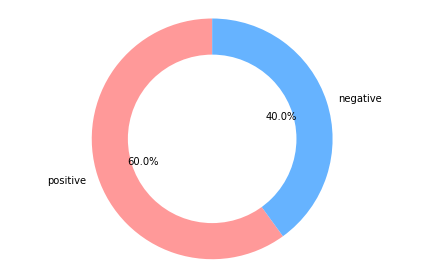

In [ ]:
import matplotlib.pyplot as plt
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(df_value_counts_reset['counts'], colors = colors, labels=df_value_counts_reset['source'], autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

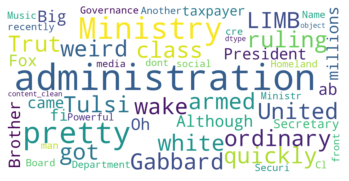

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive = df[df['sentiment_category']=='positive']
wordcloud = WordCloud(max_words=2000, width = 1600 , height = 800, background_color="white", collocations=False).generate(str(positive['content_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

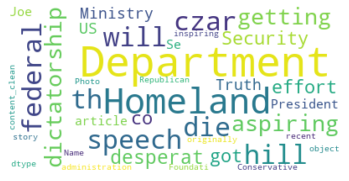

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
negative = df[df['sentiment_category']=='negative']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(negative['content_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


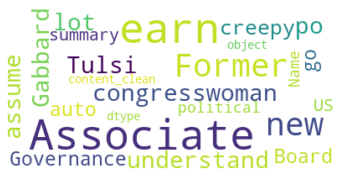

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
neutral = df[df['sentiment_category']=='neutral']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(neutral['content_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()